In [147]:
import numpy as np
import sys
sys.path.insert(0,"../")
import hessian_calc as hc
import pandas as pd
import scipy.sparse as scsp
import scipy.sparse.linalg
from numba import njit
import glob
import matplotlib.pyplot as plt
import matplotlib as mpl
%config InlineBackend.figure_format = 'retina'
%matplotlib inline
import gsd.hoomd
import gsd.fl

In [74]:
def get_r(pid):
    if pid == 0:
        r = 5/12
    else:
        r = 7/12
    return r

"""traj = dir + "traj.gsd"
df = pd.read_csv(dir+'log.dat', delimiter='\t')
df2 = df.iloc[9::10,:]
tmp = gsd.fl.open(name=traj, mode='rb')
print(tmp.nframes)
frames = tmp.nframes
tmp.close()
with gsd.hoomd.open(name=traj, mode='rb') as t:
    s = t[0]
    s2 = t[-1]"""

'traj = dir + "traj.gsd"\ndf = pd.read_csv(dir+\'log.dat\', delimiter=\'\t\')\ndf2 = df.iloc[9::10,:]\ntmp = gsd.fl.open(name=traj, mode=\'rb\')\nprint(tmp.nframes)\nframes = tmp.nframes\ntmp.close()\nwith gsd.hoomd.open(name=traj, mode=\'rb\') as t:\n    s = t[0]\n    s2 = t[-1]'

In [170]:
@njit
def overlap_matrix(vecs):
    l = len(vecs)
    for i in np.arange(l):
        vecs[i] = vecs[i]/np.linalg.norm(vecs[i])
    olap = np.zeros((l,l))
    for i in np.arange(l):
        for j in np.arange(i+1, l):
            tmp = np.dot(vecs[i],vecs[j])
            olap[i,j] = tmp
            olap[j,i] = tmp
    return olap

@njit
def abs_overlap_matrix(vecs):
    l = len(vecs)
    for i in np.arange(l):
        vecs[i] = vecs[i]/np.linalg.norm(vecs[i])
    olap = np.zeros((l,l))
    for i in np.arange(l):
        for j in np.arange(i+1, l):
            tmp = np.abs(np.dot(vecs[i],vecs[j]))
            olap[i,j] = tmp
            olap[j,i] = tmp
    return olap

@njit
def particle_overlap_matrix(vecs):
    l = len(vecs)
    r = vecs[0].size//2
    nvecs = np.zeros((l,r))
    for i in np.arange(l):
        vecs[i] = vecs[i]/np.linalg.norm(vecs[i])
        for j in np.arange(r):
            nvecs[i,j] = np.linalg.norm(vecs[i,2*j:2*(j+1)])
    olap = np.zeros((l,l))
    for i in np.arange(l):
        for j in np.arange(i+1, l):
            tmp = np.dot(nvecs[i],nvecs[j])
            olap[i,j] = tmp
            olap[j,i] = tmp
    return olap

In [171]:
dir1 = "../../hoomd_test/final_data/"

In [194]:
dirs = glob.glob(dir1+"constPhi1.0_*/")

In [195]:
dirs

['../../hoomd_test/final_data/constPhi1.0_N10000_seed1_maxStrain0.01_strainStep0.0001/',
 '../../hoomd_test/final_data/constPhi1.0_N10000_seed2_maxStrain0.01_strainStep0.0001/',
 '../../hoomd_test/final_data/constPhi1.0_N10000_seed0_maxStrain0.01_strainStep0.0001/',
 '../../hoomd_test/final_data/constPhi1.0_N10000_seed3_maxStrain0.01_strainStep0.0001/',
 '../../hoomd_test/final_data/constPhi1.0_N10000_seed4_maxStrain0.01_strainStep0.0001/',
 '../../hoomd_test/final_data/constPhi1.0_N10000_seed5_maxStrain0.01_strainStep0.0001/',
 '../../hoomd_test/final_data/constPhi1.0_N10000_seed6_maxStrain0.01_strainStep0.0001/',
 '../../hoomd_test/final_data/constPhi1.0_N10000_seed7_maxStrain0.01_strainStep0.0001/',
 '../../hoomd_test/final_data/constPhi1.0_N10000_seed8_maxStrain0.01_strainStep0.0001/',
 '../../hoomd_test/final_data/constPhi1.0_N10000_seed9_maxStrain0.01_strainStep0.0001/',
 '../../hoomd_test/final_data/constPhi1.0_N10000_seed10_maxStrain0.02_strainStep0.0001/',
 '../../hoomd_test/f

800
80002
../../hoomd_test/final_data/constPhi1.0_N10000_seed40_maxStrain0.05_strainStep0.0001/quasi/0.npz
../../hoomd_test/final_data/constPhi1.0_N10000_seed40_maxStrain0.05_strainStep0.0001/quasi/79940.npz
399 401


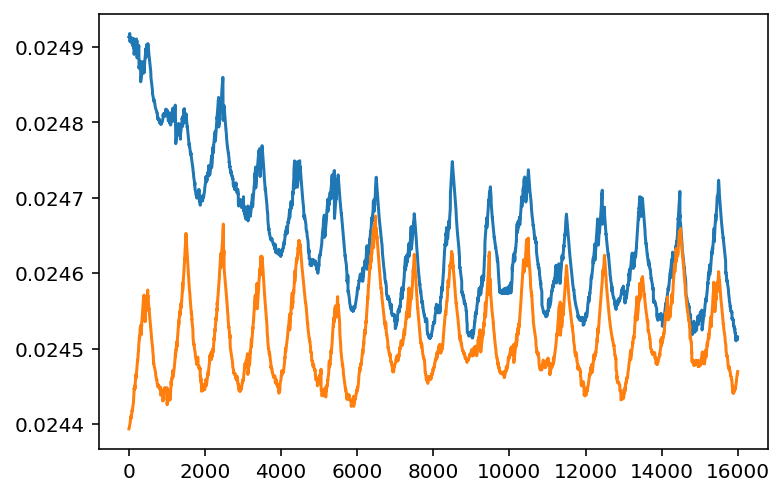

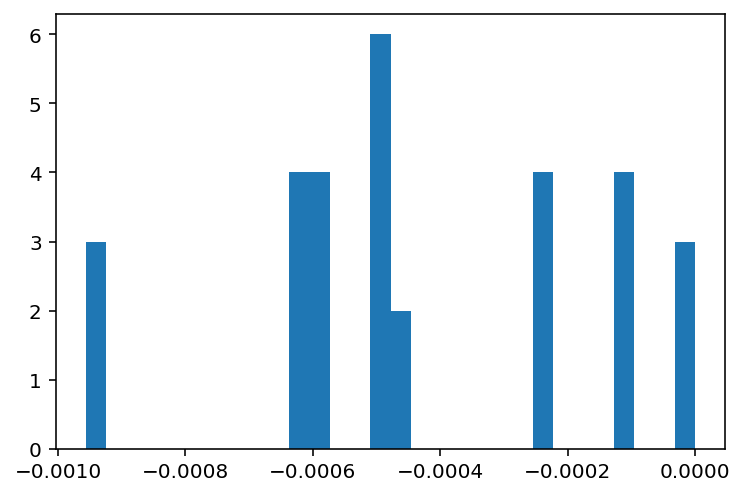

<Figure size 432x288 with 0 Axes>

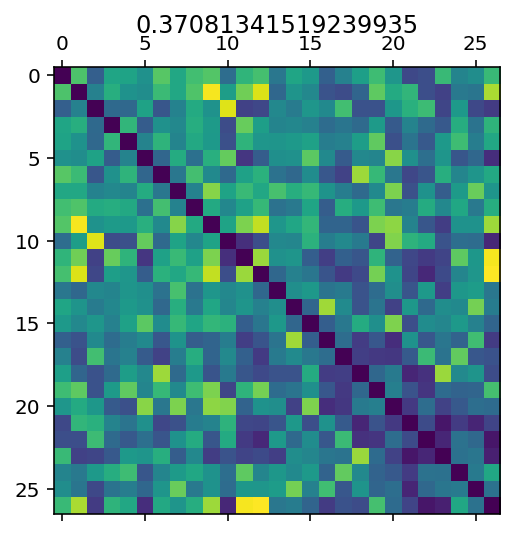

<Figure size 432x288 with 0 Axes>

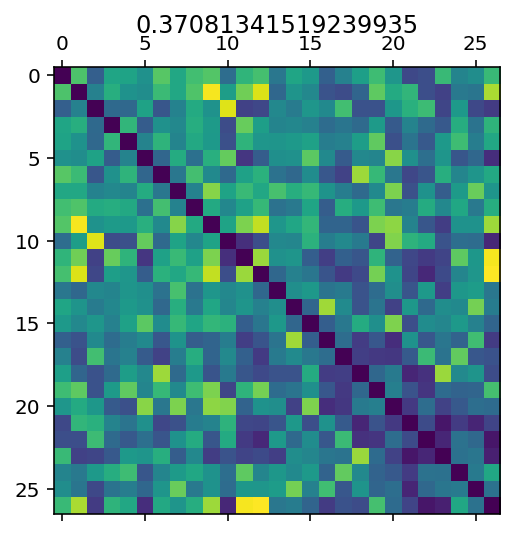

<Figure size 432x288 with 0 Axes>

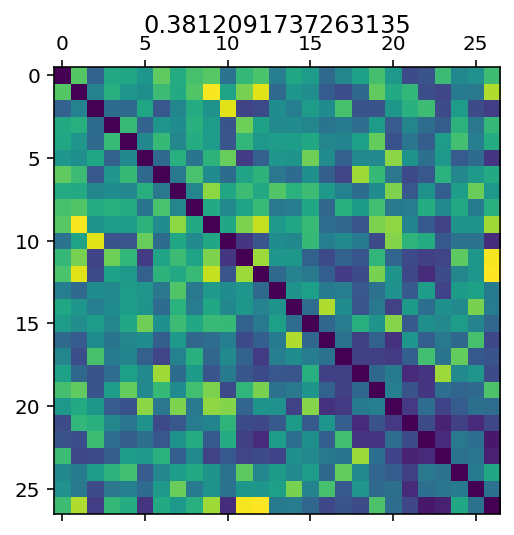

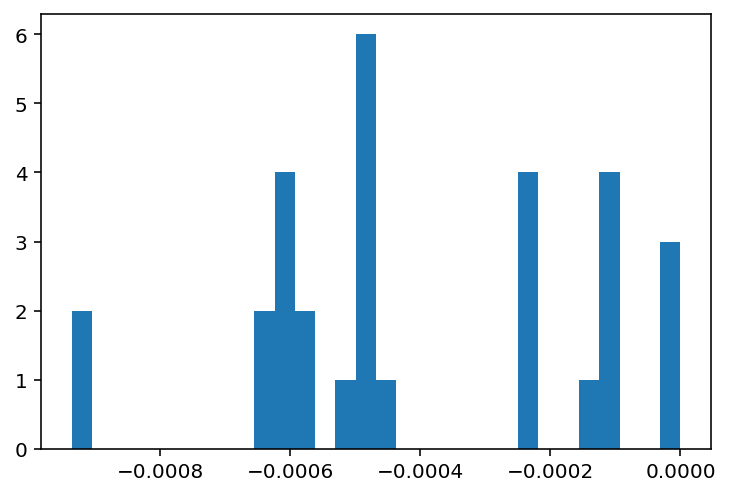

<Figure size 432x288 with 0 Axes>

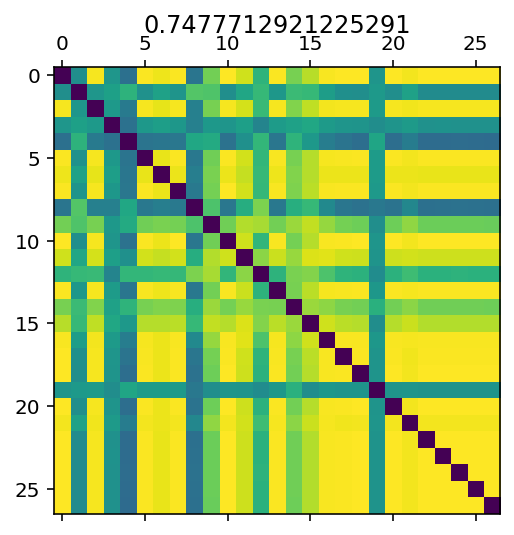

<Figure size 432x288 with 0 Axes>

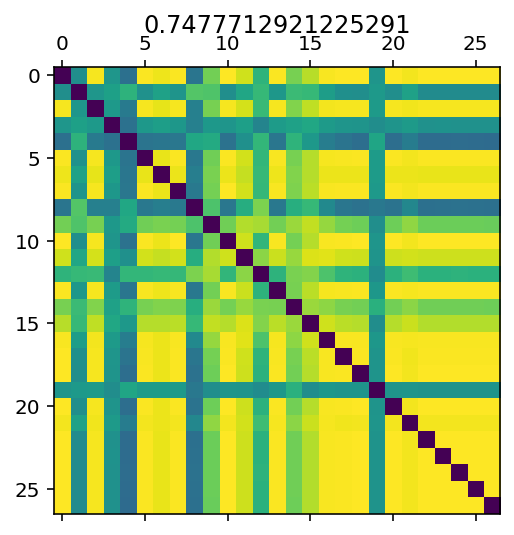

<Figure size 432x288 with 0 Axes>

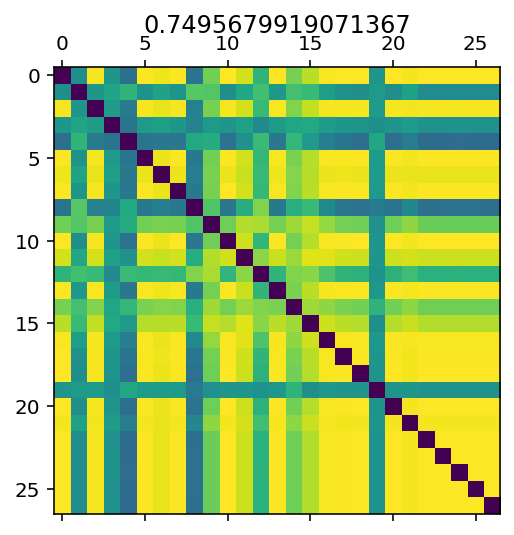

In [254]:
dir = dirs[31]
tmp = glob.glob(dir+"quasi/*")
print(len(tmp))
df = pd.read_csv(dir+'log.dat', delimiter='\t')
traj = dir+'traj.gsd'
#df = df.iloc[19:len(df.index)//4:10,:]
tmp2 = gsd.fl.open(name=traj, mode='rb')
print(tmp2.nframes)
frames = tmp2.nframes
tmp2.close()
df.iloc[19:len(df.index)//5:10,:].reset_index().pressure.plot()
df.iloc[len(df.index)//5*4::10,:].reset_index().pressure.plot()
for i in [0,-5]:
    a = np.load(tmp[i])
    print(tmp[i])
    t2 = a["filt_vecs"][:-3]
    plt.figure()
    plt.hist(a['evals'],bins=30)
    olap = overlap_matrix(t2)
    plt.figure()
    plt.matshow(olap)
    plt.title(np.mean(olap))
    olap = abs_overlap_matrix(t2)
    plt.figure()
    plt.matshow(olap)
    plt.title(np.mean(olap))
    olap = particle_overlap_matrix(t2)
    plt.figure()
    plt.matshow(olap)
    plt.title(np.mean(olap))
    
t3s = np.array([int(t.split('/')[-1].replace('.npz','')) for t in tmp])
m = np.max(t3s)/2
a = t3s[t3s > m]
b = t3s[t3s < m]
print(len(a), len(b))
for a1 in a:
    pass

for b1 in b:
    pass


In [84]:
a = np.load(tmp[0])

In [85]:
a.files

['filt_vecs', 'evecs', 'evals']

In [86]:
t2 = a["filt_vecs"]

In [87]:
t2.dtype

dtype('float64')

In [88]:
olap = overlap_matrix(t2)

In [95]:
len(tmp)

141

<Figure size 432x288 with 0 Axes>

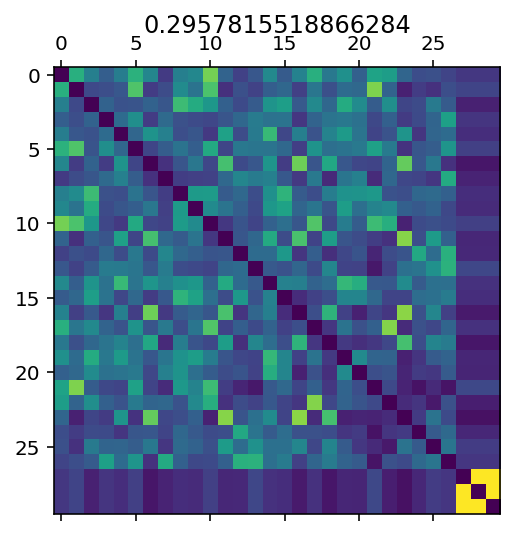

<Figure size 432x288 with 0 Axes>

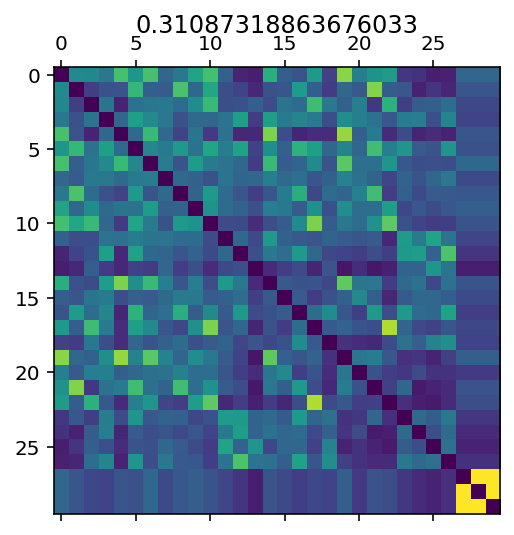

<Figure size 432x288 with 0 Axes>

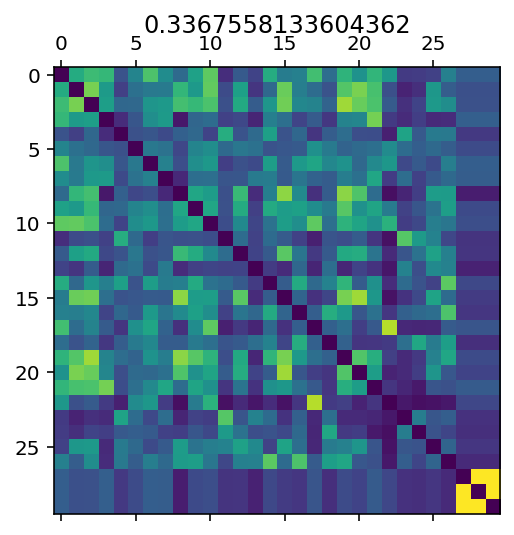

<Figure size 432x288 with 0 Axes>

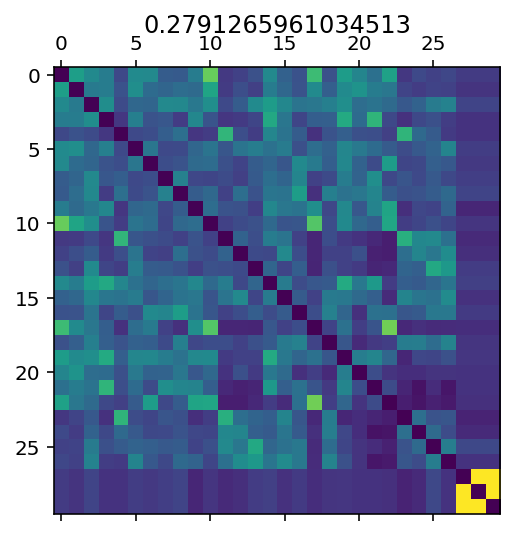

<Figure size 432x288 with 0 Axes>

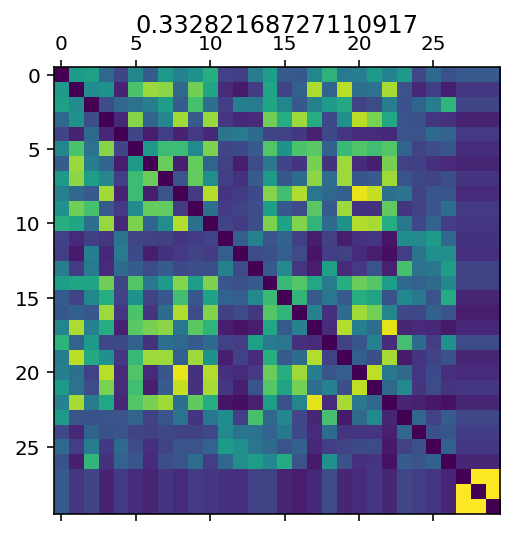

<Figure size 432x288 with 0 Axes>

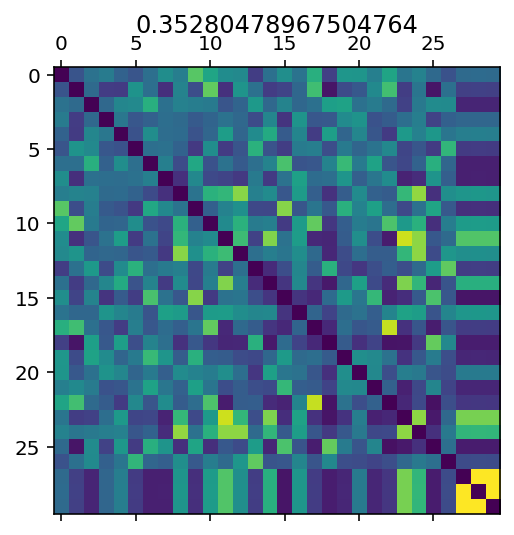

<Figure size 432x288 with 0 Axes>

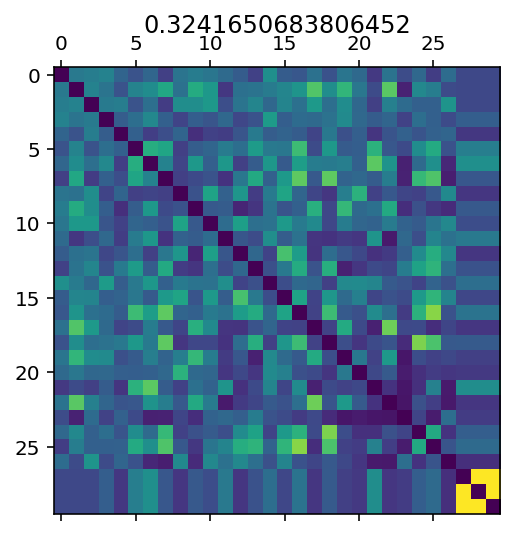

<Figure size 432x288 with 0 Axes>

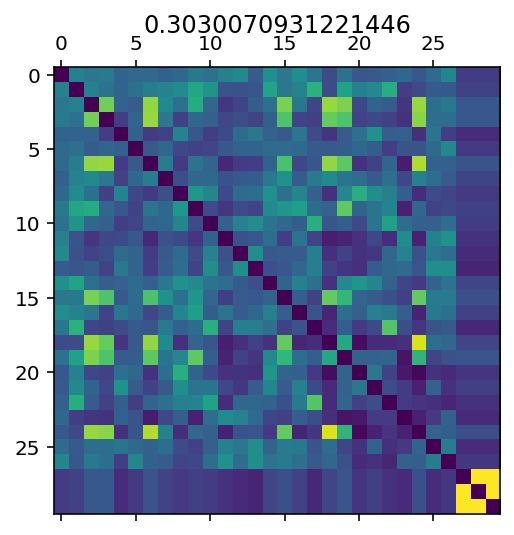

<Figure size 432x288 with 0 Axes>

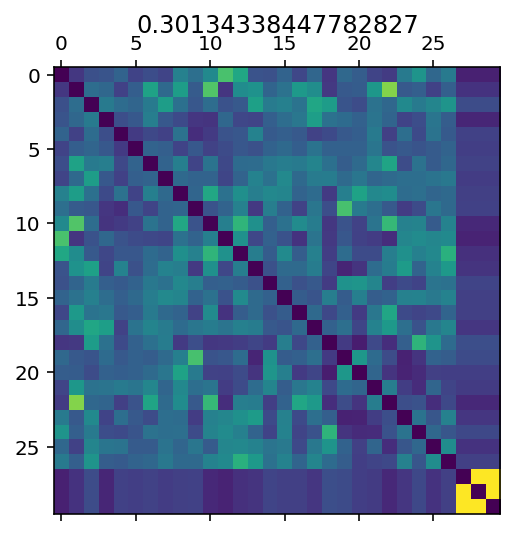

<Figure size 432x288 with 0 Axes>

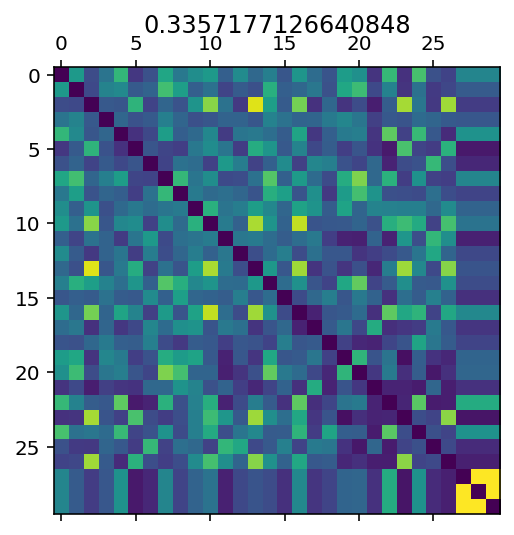

In [92]:
for i in np.arange(10):
    a = np.load(tmp[i])
    t2 = a["filt_vecs"]
    olap = overlap_matrix(t2)
    plt.figure()
    plt.matshow(olap)
    plt.title(np.mean(olap))

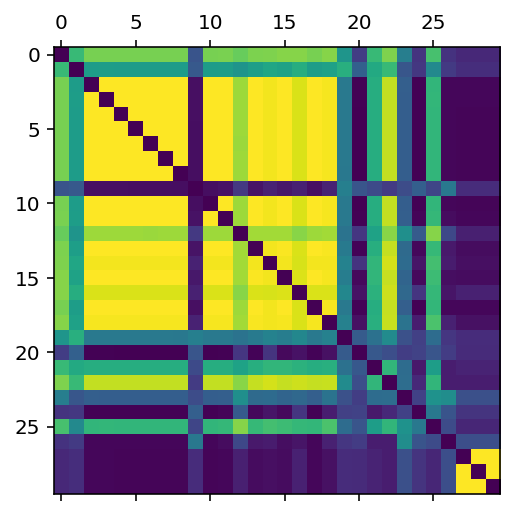

In [83]:
np.mean(olap)

0.4806900965878027

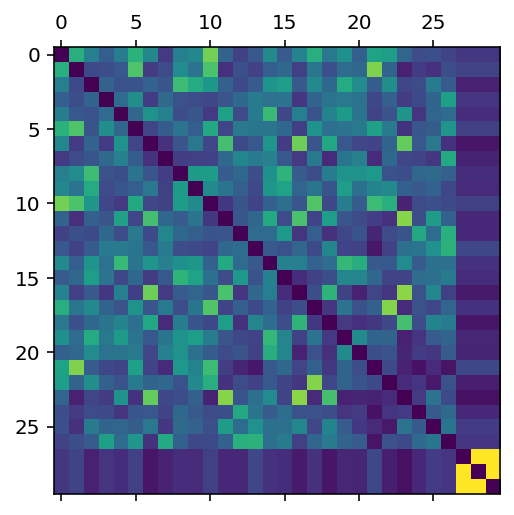

In [89]:
plt.matshow(olap)

In [90]:
np.mean(olap)

0.2957815518866284